In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras를 임포트합니다
import tensorflow as tf
from tensorflow import keras

# 헬퍼(helper) 라이브러리를 임포트합니다
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.15.0


In [166]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [167]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [168]:
train_images.shape

(60000, 28, 28)

In [169]:
len(train_labels)

60000

train_labels

In [170]:
test_images.shape

(10000, 28, 28)

In [171]:
test_labels.shape

(10000,)

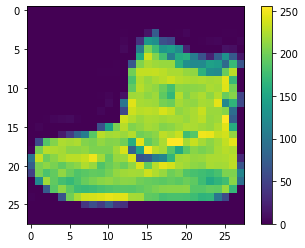

In [172]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

#### 신경망 주입 전에 값의 범위를 0~1로 정규화

In [173]:
train_images = train_images / 255.0

test_images = test_images / 255.0

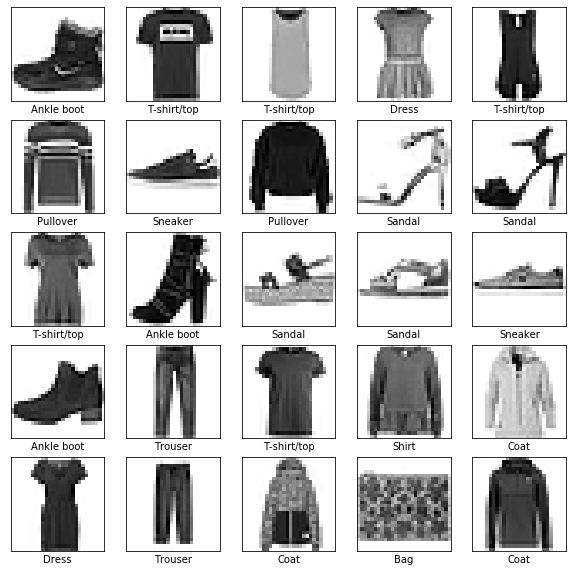

In [174]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [175]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    keras.layers.Dense(10, activation='softmax')
])

# model = keras.Sequential([
#     keras.layers.Flatten(input_shape=(28, 28)),
#     keras.layers.Dense(128, activation='relu'),
#     keras.layers.Dense(10, activation='softmax')
# ])


# train_images = np.expand_dims(train_images, 3)
# test_images = np.expand_dims(test_images, 3)

In [178]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [179]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 14, 14, 128)       36992     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 6272)              0         
_________________________________________________________________
dense_52 (Dense)             (None, 128)               802944    
_________________________________________________________________
dense_53 (Dense)             (None, 10)              

In [180]:
# model.fit(train_images, train_labels, epochs=5)
model.fit(train_images, train_labels, epochs=10)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 24s 407us/sample - loss: 0.3623 - acc: 0.8705
Epoch 2/10
60000/60000 [==============================] - 25s 423us/sample - loss: 0.2330 - acc: 0.9140
Epoch 3/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.1878 - acc: 0.9309
Epoch 4/10
60000/60000 [==============================] - 23s 383us/sample - loss: 0.1518 - acc: 0.9432
Epoch 5/10
60000/60000 [==============================] - 25s 424us/sample - loss: 0.1234 - acc: 0.9546
Epoch 6/10
60000/60000 [==============================] - 25s 414us/sample - loss: 0.0986 - acc: 0.9638
Epoch 7/10
60000/60000 [==============================] - 25s 410us/sample - loss: 0.0789 - acc: 0.9711
Epoch 8/10
60000/60000 [==============================] - 25s 414us/sample - loss: 0.0636 - acc: 0.9762
Epoch 9/10
60000/60000 [==============================] - 25s 409us/sample - loss: 0.0520 - acc: 0.9808
Epoch 10/10
60000/60000 [================

In [183]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

10000/10000 - 1s - loss: 0.3444 - acc: 0.9195

테스트 정확도: 0.9195


In [184]:
predictions = model.predict(test_images)

In [185]:
predictions[0]

array([3.5652499e-12, 3.9811088e-13, 2.3719048e-11, 9.1747305e-16,
       3.6502739e-14, 5.2606803e-09, 3.7564987e-13, 2.5594975e-09,
       2.0153124e-13, 1.0000000e+00], dtype=float32)

In [186]:
test_labels[1]

2

In [187]:
np.argmax(predictions[1])

2

In [188]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [202]:
# test_images = np.squeeze(test_images, axis=3)
# np.squeeze(train_images, axis=3)
test_images.shape

(10000, 28, 28)

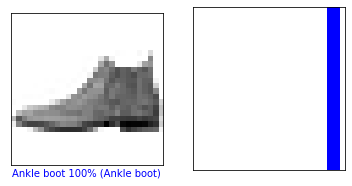

In [203]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

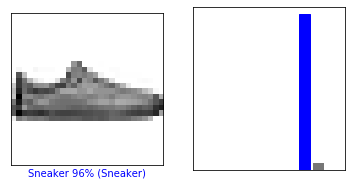

In [204]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
plt.show()

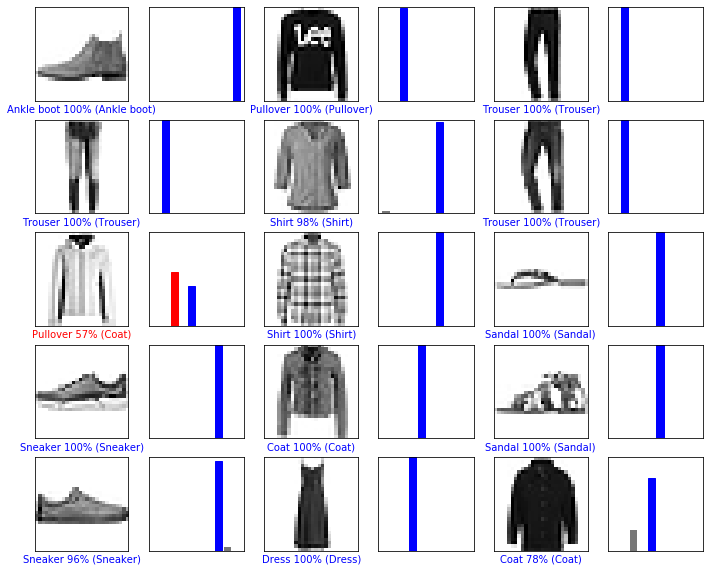

In [205]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력합니다
# 올바른 예측은 파랑색으로 잘못된 예측은 빨강색으로 나타냅니다
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

In [213]:
# 테스트 세트에서 이미지 하나를 선택합니다
img = test_images[0]

print(img.shape)

(28, 28)


In [214]:
# 이미지 하나만 사용할 때도 배치에 추가합니다
img = (np.expand_dims(img,0))

img = np.expand_dims(img, axis=3)
print(img.shape)

(1, 28, 28, 1)


In [215]:
predictions_single = model.predict(img)

print(predictions_single)

[[3.5652362e-12 3.9810936e-13 2.3719002e-11 9.1747305e-16 3.6502600e-14
  5.2606803e-09 3.7564773e-13 2.5594926e-09 2.0153086e-13 1.0000000e+00]]


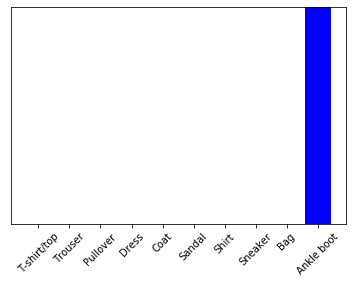

In [217]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [220]:
np.argmax(predictions_single[0])

9